In [1]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
airport1 = cv2.imread('indoor_splited/train/airport_inside/airport_inside_0001.jpg')
airport1 = cv2.cvtColor(airport1,cv2.COLOR_BGR2RGB)

In [3]:
type(airport1)

numpy.ndarray

In [4]:
airport1.shape

(368, 500, 3)

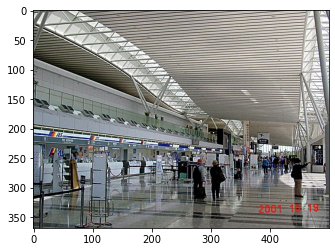

In [5]:
plt.imshow(airport1)

In [8]:
bedroom1 = cv2.imread('indoor_splited/train/bedroom/8_cuarto.jpg')
bedroom1 = cv2.cvtColor(bedroom1,cv2.COLOR_BGR2RGB)

In [9]:
bedroom1.shape

(480, 640, 3)

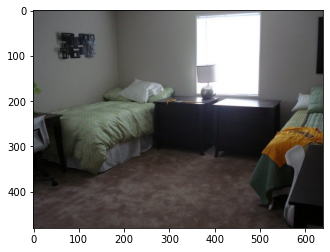

In [10]:
plt.imshow(bedroom1)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [12]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

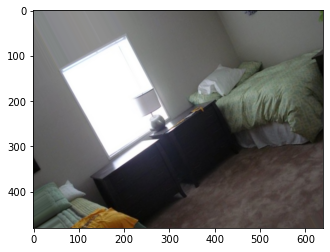

In [13]:
plt.imshow(image_gen.random_transform(bedroom1))

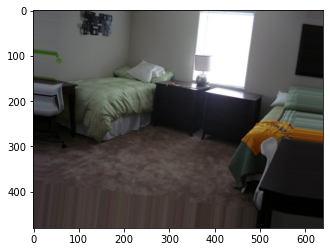

In [14]:
plt.imshow(image_gen.random_transform(bedroom1))

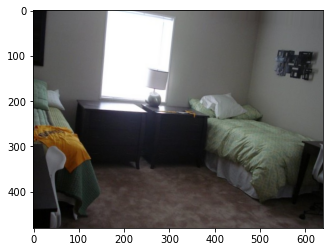

In [15]:
plt.imshow(image_gen.random_transform(bedroom1))

In [16]:
image_gen.flow_from_directory('indoor_splited/train')

Found 886 images belonging to 2 classes.


In [17]:
image_gen.flow_from_directory('indoor_splited/test')

Found 384 images belonging to 2 classes.


In [18]:
# width,height,channels
image_shape = (150,150,3)

In [19]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [20]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [26]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('indoor_splited/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 886 images belonging to 2 classes.


In [27]:
test_image_gen = image_gen.flow_from_directory('indoor_splited/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 384 images belonging to 2 classes.


In [28]:
train_image_gen.class_indices

{'airport_inside': 0, 'bedroom': 1}

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
results = model.fit_generator(train_image_gen,epochs=50,
                              steps_per_epoch=50,
                              validation_data=test_image_gen,
                             validation_steps=12)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
50/50 [==============================] - 118s 2s/step - loss: 0.5485 - accuracy: 0.7228 - val_loss: 0.3470 - val_accuracy: 0.8802
Epoch 2/50
50/50 [==============================] - 80s 2s/step - loss: 0.4824 - accuracy: 0.7924 - val_loss: 0.4675 - val_accuracy: 0.7917
Epoch 3/50
50/50 [==============================] - 68s 1s/step - loss: 0.3722 - accuracy: 0.8595 - val_loss: 0.3652 - val_accuracy: 0.8490
Epoch 4/50
50/50 [==============================] - 28s 555ms/step - loss: 0.3555 - accuracy: 0.8785 - val_loss: 0.2856 - val_accuracy: 0.8958
Epoch 5/50
50/50 [==============================] - 27s 531ms/step - loss: 0.3201 - accuracy: 0.8709 - val_loss: 0.3010 - val_accuracy: 0.8438
Epoch 6/50
50/50 [==============================] - 26s 526ms/step - loss: 0.3203 - accuracy: 0.8709 - val_loss: 0.2830 - val_accuracy: 0.8802
Epoch 7/50
50/50 [==============================] - 27s 532ms/step - loss:

In [31]:
# model.save('cat_dog2.h5')

In [33]:
results.history['accuracy']

[0.7227848172187805,
 0.7924050688743591,
 0.8594936728477478,
 0.8784810304641724,
 0.8708860874176025,
 0.8708860874176025,
 0.8822785019874573,
 0.8835443258285522,
 0.8772152066230774,
 0.8936708569526672,
 0.8987341523170471,
 0.8936708569526672,
 0.9101265668869019,
 0.8999999761581421,
 0.9151898622512817,
 0.8860759735107422,
 0.9215189814567566,
 0.9164556860923767,
 0.9341772198677063,
 0.9375,
 0.9430379867553711,
 0.9227848052978516,
 0.9329113960266113,
 0.9278481006622314,
 0.9287499785423279,
 0.9354430437088013,
 0.9316455721855164,
 0.9329113960266113,
 0.9379746913909912,
 0.9113923907279968,
 0.9341772198677063,
 0.9443038105964661,
 0.9506329298019409,
 0.949367105960846,
 0.9300000071525574,
 0.9582278728485107,
 0.9518987536430359,
 0.948101282119751,
 0.956250011920929,
 0.948101282119751,
 0.9303797483444214,
 0.9607595205307007,
 0.9316455721855164,
 0.9569620490074158,
 0.9531645774841309,
 0.9531645774841309,
 0.9544304013252258,
 0.9569620490074158,
 0.96582

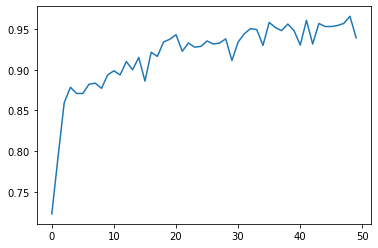

In [34]:
plt.plot(results.history['accuracy'])

In [28]:
# model.save('cat_dog_100epochs.h5')

In [59]:
train_image_gen.class_indices

{'airport_inside': 0, 'bedroom': 1}

In [60]:
import numpy as np
from keras.preprocessing import image

airport_file = 'indoor_splited/train/airport_inside/airport_inside_0414.jpg'

airport_img = image.load_img(airport_file, target_size=(150, 150))

airport_img = image.img_to_array(airport_img)

airport_img = np.expand_dims(airport_img, axis=0)
airport_img = airport_img/255

In [61]:
prediction_prob = model.predict(airport_img)

In [62]:
# Output prediction
print(f'Probability that image is a bedroom is: {prediction_prob}')

Probability that image is a bedroom is: [[0.99998224]] 
